In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow.keras.utils as image
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow.keras.utils as image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import colorsys
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# function to create a list of numbers as x for graph plotting
def createList(r1, r2):
    # Testing if range r1 and r2
    # are equal
    if (r1 == r2):
        return r1
    else:
        # Create empty list
        res = []
        # loop to append successors to
        # list until r2 is reached.
        while(r1 < r2+1 ): 
            res.append(r1)
            r1 += 1
    return res

# function to determine R-squred for keras models
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

100%|████████████████████████████████████████████████████████████████████████████████| 260/260 [00:19<00:00, 13.57it/s]


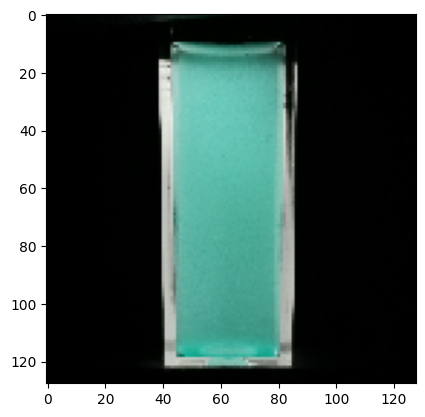

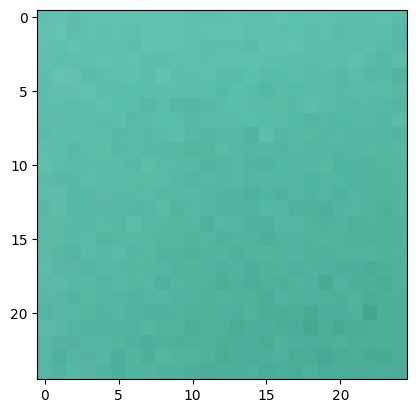

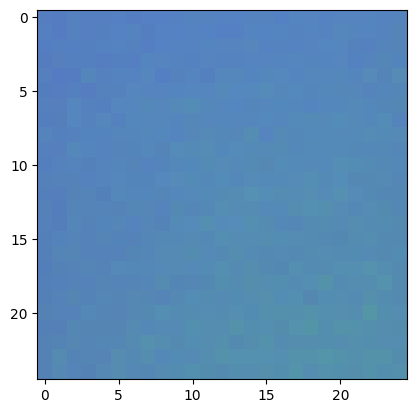

[ 85.7936 183.0688 164.16  ]
(0.467602568109172, 0.5313587023020854, 183.0688)


In [3]:
# Load the data
csv_file = r'C:\\Users\\User\\Documents\\Year 4\\ml_mep2\\image\\image_dataset\\image_feature.csv'
df = pd.read_csv(csv_file)

df_RGBimage = []
df_HSVimage = []
df_RGB = []
df_HSV = []

image_width = 128
image_height = 128

for i in tqdm(range(df.shape[0])):
    # Load images according to the csv file
    img = cv2.imread(r'C:\\Users\\User\\Documents\\Year 4\\ml_mep2\\image\\image_dataset\\'+df['img_id'][i]+'.jpg')
    img = cv2.resize(img, (image_width, image_height))
    
    # Crop 20% of the image from the image midpoint
    left = int(image_width*0.4)
    top = int(image_height*0.4)
    right = int(image_width*0.6)
    bottom = int(image_height*0.6)
    img_crop = img[left:right, top:bottom]
    
    # Image to array
    img_RGB = image.img_to_array(img_crop)
    
     # Convert image into HSV image
    img_HSV1 = cv2.cvtColor(img_crop, cv2.COLOR_RGB2HSV)
    img_HSV = image.img_to_array(img_HSV1)
    
    # Obtain average RGB value of the image
    average_RGB = img_crop.mean(axis=(0, 1))
    
    # Convert the average RGB value to HSV
    average_HSV = colorsys.rgb_to_hsv(*average_RGB)
    
    # Append Data into df
    df_RGBimage.append(img_RGB)
    df_HSVimage.append(img_HSV)
    df_RGB.append(average_RGB)
    df_HSV.append(average_HSV)

# Prepare X and Y for the models

num_channel = 3 #RGB and HSV both = 3
image_width = int(right-left)
image_height = int(bottom-top)
X_col = len(df.index)

X_RGBimage = np.array(df_RGBimage)
X_RGBimage = X_RGBimage.reshape(X_col, image_width, image_height, num_channel)
X_RGBimage /= 255

X_HSVimage = np.array(df_HSVimage)
X_HSVimage = X_HSVimage.reshape(X_col, image_width, image_height, num_channel)
X_HSVimage /= 360

X_RGB = np.array(df_RGB)
X_RGB /= 255

X_HSV = np.array(df_HSV)
X_HSV /= 360

y1 = np.array(df['absorbance'])

# Plot and show example result
plt.figure()
plt.imshow(img) 
plt.show()
plt.figure()
plt.imshow(img_crop) 
plt.show()
plt.figure()
plt.imshow(img_HSV1) 
plt.show()
print(average_RGB)
print(average_HSV)

In [4]:
# Split the data into training and validation sets
X_RGBimage_train, X_RGBimage_test, y1_RGBimage_train, y1_RGBimage_test = train_test_split(
    X_RGBimage, 
    y1, 
    test_size=0.2, 
    random_state=1
)

X_HSVimage_train, X_HSVimage_test, y1_HSVimage_train, y1_HSVimage_test = train_test_split(
    X_HSVimage, 
    y1, 
    test_size=0.2, 
    random_state=1
)

X_RGB_train, X_RGB_test, y1_RGB_train, y1_RGB_test = train_test_split(
    X_RGB, 
    y1, 
    test_size=0.2, 
    random_state=1
)

X_HSV_train, X_HSV_test, y1_HSV_train, y1_HSV_test = train_test_split(
    X_HSV, 
    y1, 
    test_size=0.2, 
    random_state=1
)


LR_RGB - R^2: 0.9367903635750645
LR_RGB - MSE: 0.28882186372249574
LR_RGB - MAE: 0.41411326319649205


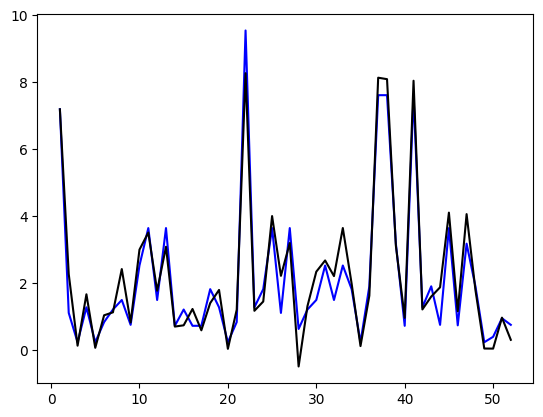

In [5]:
# Linear Regression Model - RGB
model = LinearRegression()
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
score_LR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('LR_RGB - R^2:', score_LR_RGB)

y_pred = model.predict(X_RGB_test)

# Calculate the MSE and MAE
mse_LR_RGB = mean_squared_error(y1_RGB_test, y_pred)
mae_LR_RGB = mean_absolute_error(y1_RGB_test, y_pred)

# Print the results
print("LR_RGB - MSE:", mse_LR_RGB)
print("LR_RGB - MAE:", mae_LR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

LR_HSV - R^2: 0.9417287868812576
LR_HSV - MSE: 0.2662568767392355
LR_HSV - MAE: 0.41915774124233296


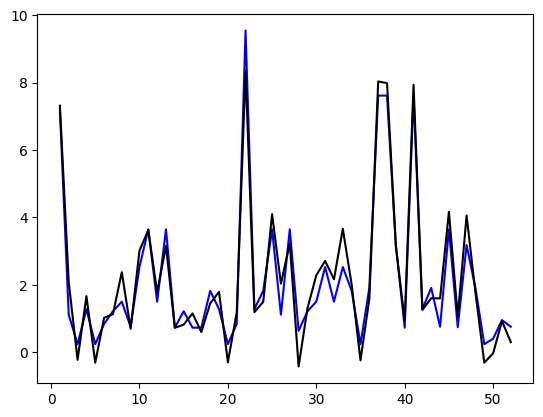

In [6]:
# Linear Regression Model - HSV
model = LinearRegression()
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
score_LR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('LR_HSV - R^2:', score_LR_HSV)

y_pred = model.predict(X_HSV_test)

# Calculate the MSE and MAE
mse_LR_HSV = mean_squared_error(y1_HSV_test, y_pred)
mae_LR_HSV = mean_absolute_error(y1_HSV_test, y_pred)

# Print the results
print("LR_HSV - MSE:", mse_LR_HSV)
print("LR_HSV - MAE:", mae_LR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

SVR_RGB - R^2: 0.9219022784835811
SVR_RGB - MSE: 0.35684953682085035
SVR_RGB - MAE: 0.38511259605962994


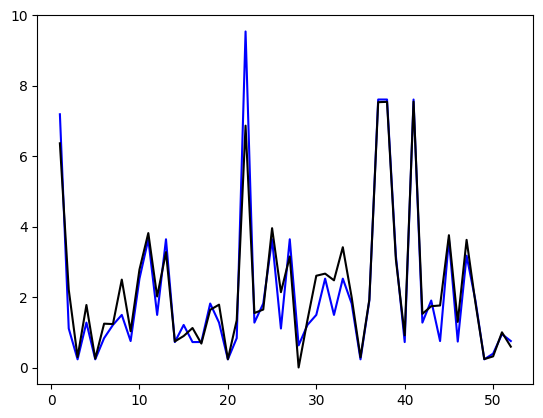

In [7]:
# Support Vector Regression - RGB
model = SVR(kernel='linear')

# Train the model
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
score_SVR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('SVR_RGB - R^2:', score_SVR_RGB)

# Make predictions on the test set
y_pred = model.predict(X_RGB_test)

# Evaluate the model
mse_SVR_RGB = mean_squared_error(y1_RGB_test, y_pred)
mae_SVR_RGB = mean_absolute_error(y1_RGB_test, y_pred)

# Print the results
print("SVR_RGB - MSE:", mse_SVR_RGB)
print("SVR_RGB - MAE:", mae_SVR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
SVR_RGB - R^2            : 0.9219022784835811
SVR_RGB - R^2 (optimized): 0.984085680186175
SVR_RGB - MSE            : 0.35684953682085035
SVR_RGB - MSE (optimized): 0.07271681611336601
SVR_RGB - MAE            : 0.38511259605962994
SVR_RGB - MAE (optimized): 0.16656139955973526


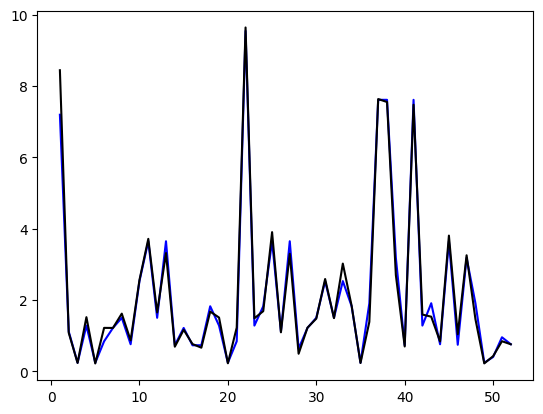

In [8]:
# Support Vector Regression - RGB (optimized via grid search method)

# Set the parameters for the grid search
parameters = {
    'kernel': ['linear', 'rbf'], 
    'C': [1, 10, 100], 
    'epsilon': [0.1, 0.01]
}

# Create the grid search object
grid_search = GridSearchCV(SVR(), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_RGB_train, y1_RGB_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create an SVM model with the best parameters
model = SVR(**best_params)

# Train the model
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
print('SVR_RGB - R^2            :', score_SVR_RGB)
score_SVR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('SVR_RGB - R^2 (optimized):', score_SVR_RGB)

# Make predictions on the test set
y_pred = model.predict(X_RGB_test)

# Evaluate the model
print("SVR_RGB - MSE            :", mse_SVR_RGB)
mse_SVR_RGB = mean_squared_error(y1_RGB_test, y_pred)
print("SVR_RGB - MSE (optimized):", mse_SVR_RGB)

print("SVR_RGB - MAE            :", mae_SVR_RGB)
mae_SVR_RGB = mean_absolute_error(y1_RGB_test, y_pred)
print("SVR_RGB - MAE (optimized):", mae_SVR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

SVR_HSV - R^2: 0.45375321893027176
SVR_HSV - MSE: 2.4959487553504656
SVR_HSV - MAE: 1.0649684178219938


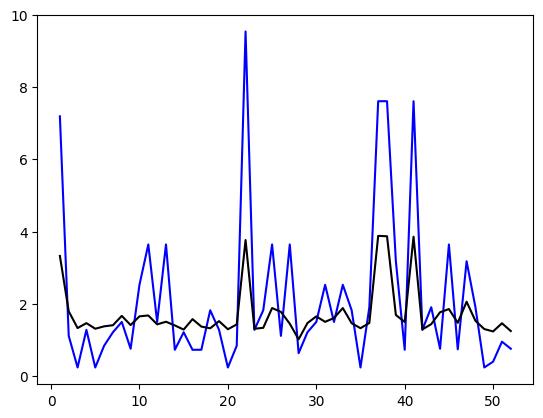

In [9]:
# Support Vector Regression - HSV
model = SVR(kernel='linear')

# Train the model
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
score_SVR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('SVR_HSV - R^2:', score_SVR_HSV)

# Make predictions on the test set
y_pred = model.predict(X_HSV_test)

# Evaluate the model
mse_SVR_HSV = mean_squared_error(y1_HSV_test, y_pred)
mae_SVR_HSV = mean_absolute_error(y1_HSV_test, y_pred)

# Print the results
print("SVR_HSV - MSE:", mse_SVR_HSV)
print("SVR_HSV - MAE:", mae_SVR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
SVR_HSV - R^2            : 0.45375321893027176
SVR_HSV - R^2 (optimized): 0.8640995360603481
SVR_HSV - MSE            : 2.4959487553504656
SVR_HSV - MSE (optimized): 0.620965844700193
SVR_HSV - MAE            : 1.0649684178219938
SVR_HSV - MAE (optimized): 0.6217496608158453


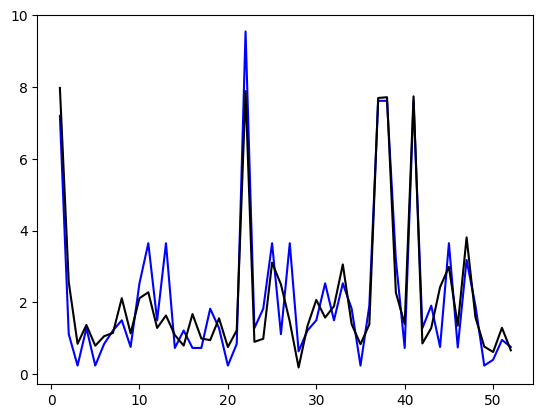

In [10]:
# Support Vector Regression - HSV (optimized via grid search method)

# Set the parameters for the grid search
parameters = {
    'kernel': ['linear', 'rbf'], 
    'C': [1, 10, 100], 
    'epsilon': [0.1, 0.01]
}

# Create the grid search object
grid_search = GridSearchCV(SVR(), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_HSV_train, y1_HSV_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create an SVM model with the best parameters
model = SVR(**best_params)

# Train the model
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
print('SVR_HSV - R^2            :', score_SVR_HSV)
score_SVR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('SVR_HSV - R^2 (optimized):', score_SVR_HSV)

# Make predictions on the test set
y_pred = model.predict(X_HSV_test)

# Evaluate the model
print("SVR_HSV - MSE            :", mse_SVR_HSV)
mse_SVR_HSV = mean_squared_error(y1_HSV_test, y_pred)
print("SVR_HSV - MSE (optimized):", mse_SVR_HSV)

print("SVR_HSV - MAE            :", mae_SVR_HSV)
mae_SVR_HSV = mean_absolute_error(y1_HSV_test, y_pred)
print("SVR_HSV - MAE (optimized):", mae_SVR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

GBR_RGB - R^2: 0.9886668109618751
GBR_RGB - MSE: 0.051784394991699706
GBR_RGB - MAE: 0.18327846369421527


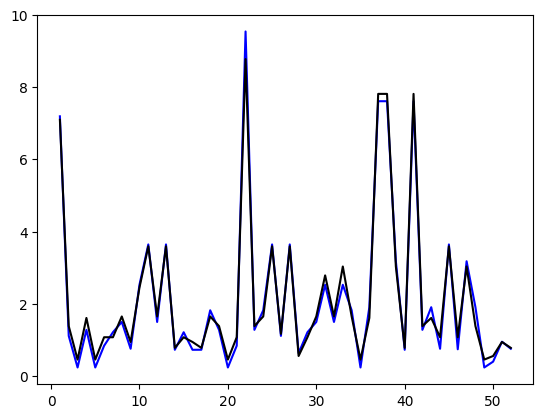

In [11]:
# Gradient Boosting Regressor - RGB

# Create the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)

# Fit the model to the training data
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
score_GBR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('GBR_RGB - R^2:', score_GBR_RGB)

# Make predictions on the test set
y_pred = model.predict(X_RGB_test)

# Evaluate the model
mse_GBR_RGB = mean_squared_error(y1_RGB_test, y_pred)
mae_GBR_RGB = mean_absolute_error(y1_RGB_test, y_pred)

# Print the results
print("GBR_RGB - MSE:", mse_GBR_RGB)
print("GBR_RGB - MAE:", mae_GBR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 4, 'n_estimators': 100}
GBR_RGB - R^2            : 0.9886668109618751
GBR_RGB - R^2 (optimized): 0.9931808793141238
GBR_RGB - MSE            : 0.051784394991699706
GBR_RGB - MSE (optimized): 0.031158400155999705
GBR_RGB - MAE            : 0.18327846369421527
GBR_RGB - MAE (optimized): 0.11624940673989717


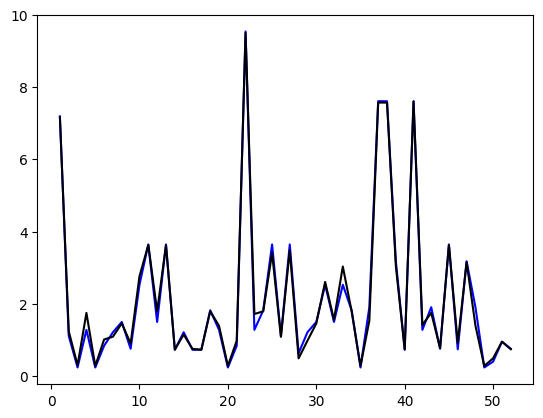

In [12]:
# Gradient Boosting Regressor - RGB (optimized)

# Set the parameters for the grid search
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [1, 2, 3, 4],
    'learning_rate': [0.1, 0.05],
    'loss': ['squared_error', 'absolute_error', 'huber']
}

# Create the grid search object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_RGB_train, y1_RGB_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create model with the best parameters
model = GradientBoostingRegressor(**best_params)

# Train the model
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
print('GBR_RGB - R^2            :', score_GBR_RGB)
score_GBR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('GBR_RGB - R^2 (optimized):', score_GBR_RGB)

# Make predictions on the test set
y_pred = model.predict(X_RGB_test)

# Evaluate the model
print("GBR_RGB - MSE            :", mse_GBR_RGB)
mse_GBR_RGB = mean_squared_error(y1_RGB_test, y_pred)
print("GBR_RGB - MSE (optimized):", mse_GBR_RGB)

print("GBR_RGB - MAE            :", mae_GBR_RGB)
mae_GBR_RGB = mean_absolute_error(y1_RGB_test, y_pred)
print("GBR_RGB - MAE (optimized):", mae_GBR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

GBR_HSV - R^2: 0.9888680969573995
GBR_HSV - MSE: 0.0508646650318914
GBR_HSV - MAE: 0.1856302689135587


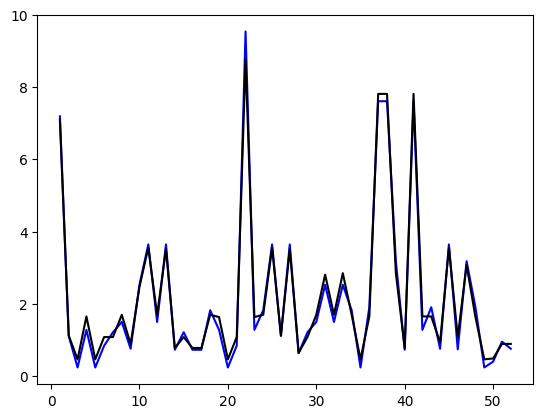

In [13]:
# Gradient Boosting Regressor - HSV

# Create the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)

# Fit the model to the training data
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
score_GBR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('GBR_HSV - R^2:', score_GBR_HSV)

# Make predictions on the test set
y_pred = model.predict(X_HSV_test)

# Evaluate the model
mse_GBR_HSV = mean_squared_error(y1_HSV_test, y_pred)
mae_GBR_HSV = mean_absolute_error(y1_HSV_test, y_pred)

# Print the results
print("GBR_HSV - MSE:", mse_GBR_HSV)
print("GBR_HSV - MAE:", mae_GBR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 2, 'n_estimators': 400}
GBR_HSV - R^2            : 0.9888680969573995
GBR_HSV - R^2 (optimized): 0.9939903143432561
GBR_HSV - MSE            : 0.0508646650318914
GBR_HSV - MSE (optimized): 0.027459873366434698
GBR_HSV - MAE            : 0.1856302689135587
GBR_HSV - MAE (optimized): 0.11316762091839629


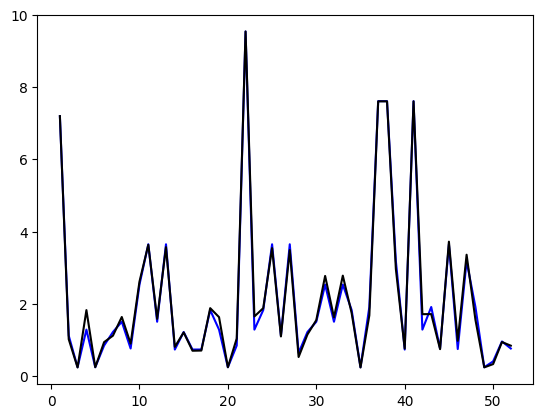

In [14]:
# Gradient Boosting Regressor - HSV (optimized)

# Set the parameters for the grid search
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [1, 2, 3],
    'learning_rate': [0.1, 0.05],
    'loss': ['squared_error', 'absolute_error', 'huber']
}

# Create the grid search object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_HSV_train, y1_HSV_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create model with the best parameters
model = GradientBoostingRegressor(**best_params)

# Train the model
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
print('GBR_HSV - R^2            :', score_GBR_HSV)
score_GBR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('GBR_HSV - R^2 (optimized):', score_GBR_HSV)

# Make predictions on the test set
y_pred = model.predict(X_HSV_test)

# Evaluate the model
print("GBR_HSV - MSE            :", mse_GBR_HSV)
mse_GBR_HSV = mean_squared_error(y1_HSV_test, y_pred)
print("GBR_HSV - MSE (optimized):", mse_GBR_HSV)

print("GBR_HSV - MAE            :", mae_GBR_HSV)
mae_GBR_HSV = mean_absolute_error(y1_HSV_test, y_pred)
print("GBR_HSV - MAE (optimized):", mae_GBR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

RFR_RGB - R^2: 0.7780125734311217
RFR_RGB - MSE: 1.0143203772532945
RFR_RGB - MAE: 0.790899504783423


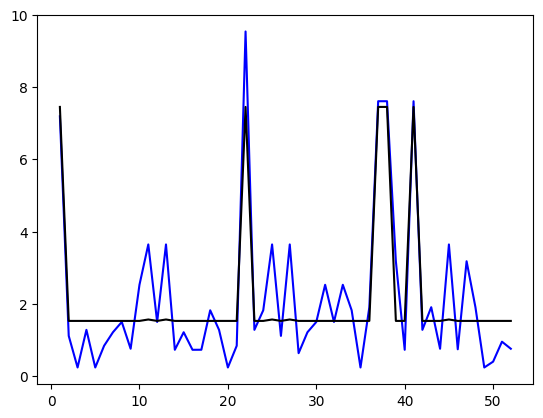

In [15]:
# Random Forest Regressor - RGB

# Create the model
model = RandomForestRegressor(n_estimators=100, max_depth=1, random_state=0)

# Fit the model to the training data
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
score_RFR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('RFR_RGB - R^2:', score_RFR_RGB)

# Make predictions on the test set
y_pred = model.predict(X_RGB_test)

# Evaluate the model
mse_RFR_RGB = mean_squared_error(y1_RGB_test, y_pred)
mae_RFR_RGB = mean_absolute_error(y1_RGB_test, y_pred)

# Print the results
print("RFR_RGB - MSE:", mse_RFR_RGB)
print("RFR_RGB - MAE:", mae_RFR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RFR_RGB - R^2            : 0.7780125734311217
RFR_RGB - R^2 (optimized): 0.9809343651388137
RFR_RGB - MSE            : 1.0143203772532945
RFR_RGB - MSE (optimized): 0.08711602383917742
RFR_RGB - MAE            : 0.790899504783423
RFR_RGB - MAE (optimized): 0.24417028396373078


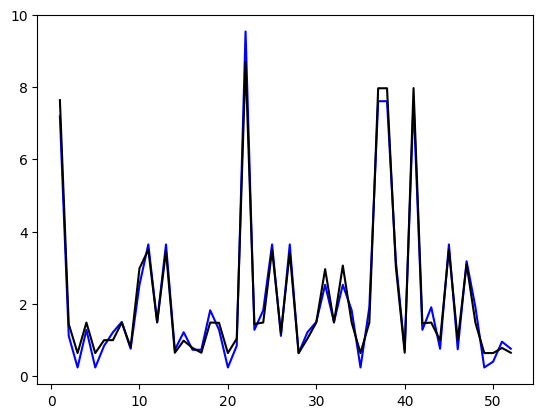

In [16]:
# Random Forest Regressor - RGB (optimized)

# Set the parameters for the grid search
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the grid search object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_RGB_train, y1_RGB_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create model with the best parameters
model = RandomForestRegressor(**best_params)

# Train the model
model.fit(X_RGB_train, y1_RGB_train)

# Evaluate the model on the validation set
print('RFR_RGB - R^2            :', score_RFR_RGB)

score_RFR_RGB = model.score(X_RGB_test, y1_RGB_test)
print('RFR_RGB - R^2 (optimized):', score_RFR_RGB)

# Make predictions on the test set
y_pred = model.predict(X_RGB_test)

# Evaluate the model
print("RFR_RGB - MSE            :", mse_RFR_RGB)
mse_RFR_RGB = mean_squared_error(y1_RGB_test, y_pred)
print("RFR_RGB - MSE (optimized):", mse_RFR_RGB)

print("RFR_RGB - MAE            :", mae_RFR_RGB)
mae_RFR_RGB = mean_absolute_error(y1_RGB_test, y_pred)
print("RFR_RGB - MAE (optimized):", mae_RFR_RGB)

#plot
x_plt = createList(1, len(y1_RGB_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

RFR_HSV - R^2: 0.7885727575481315
RFR_HSV - MSE: 0.9660680500697725
RFR_HSV - MAE: 0.7802980586772874


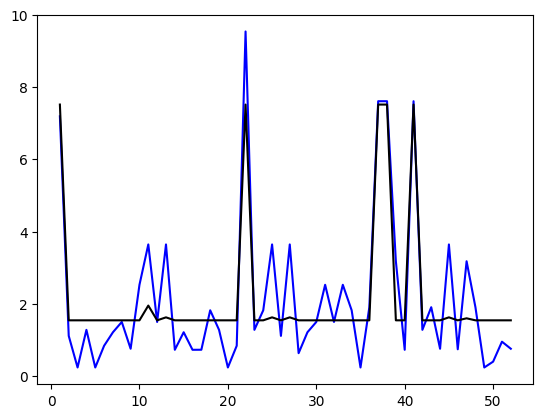

In [17]:
# Random Forest Regressor - HSV

# Create the model
model = RandomForestRegressor(n_estimators=100, max_depth=1, random_state=0)

# Fit the model to the training data
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
score_RFR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('RFR_HSV - R^2:', score_RFR_HSV)

# Make predictions on the test set
y_pred = model.predict(X_HSV_test)

# Evaluate the model
mse_RFR_HSV = mean_squared_error(y1_HSV_test, y_pred)
mae_RFR_HSV = mean_absolute_error(y1_HSV_test, y_pred)

# Print the results
print("RFR_HSV - MSE:", mse_RFR_HSV)
print("RFR_HSV - MAE:", mae_RFR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_HSV_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RFR_HSV - R^2            : 0.7885727575481315
RFR_HSV - R^2 (optimized): 0.9460771230206074
RFR_HSV - MSE            : 0.9660680500697725
RFR_HSV - MSE (optimized): 0.24638815704883918
RFR_HSV - MAE            : 0.7802980586772874
RFR_HSV - MAE (optimized): 0.4101420517583936


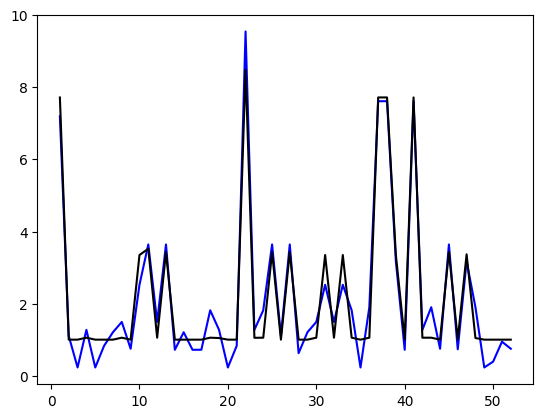

In [18]:
# Random Forest Regressor - HSV (optimized)

# Set the parameters for the grid search
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [1, 2],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create the grid search object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), parameters, cv=5, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_HSV_train, y1_HSV_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)

# Create model with the best parameters
model = RandomForestRegressor(**best_params)

# Train the model
model.fit(X_HSV_train, y1_HSV_train)

# Evaluate the model on the validation set
print('RFR_HSV - R^2            :', score_RFR_HSV)

score_RFR_HSV = model.score(X_HSV_test, y1_HSV_test)
print('RFR_HSV - R^2 (optimized):', score_RFR_HSV)

# Make predictions on the test set
y_pred = model.predict(X_HSV_test)

# Evaluate the model
print("RFR_HSV - MSE            :", mse_RFR_HSV)
mse_RFR_HSV = mean_squared_error(y1_HSV_test, y_pred)
print("RFR_HSV - MSE (optimized):", mse_RFR_HSV)

print("RFR_HSV - MAE            :", mae_RFR_HSV)
mae_RFR_HSV = mean_absolute_error(y1_HSV_test, y_pred)
print("RFR_HSV - MAE (optimized):", mae_RFR_HSV)

#plot
x_plt = createList(1, len(y1_HSV_test))

plt.plot(x_plt, y1_RGB_test, color ='b')
plt.plot(x_plt, y_pred, color ='k')
#plt.xlim([50, 75])
plt.show()

Epoch 145: early stopping
2/2 [==============================] - 0s 2ms/step - loss: 0.0827 - mae: 0.2178 - mse: 0.0827 - r_square: 0.9819
DNN_RGB - R^2: 0.9818928241729736
DNN_RGB - MSE: 0.21775278449058533
DNN_RGB - MAE 0.08274360001087189


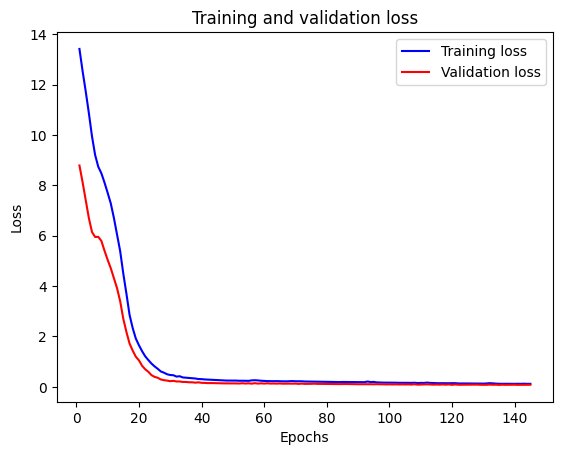

In [19]:
# Dense Neural Network (DNN) - RGB

# Create the model
model = Sequential()
model.add(Dense(32, input_dim=X_RGB_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', r_square]
)

# Fit the model to the training data
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10
)

history = model.fit(
    X_RGB_train, 
    y1_RGB_train, 
    epochs=1000, 
    batch_size=32, 
    validation_data=(X_RGB_test, y1_RGB_test), 
    callbacks=[es], 
    verbose=0
)

# Evaluate the model on the test data
score = model.evaluate(X_RGB_test, y1_RGB_test)
mse_DNN_RGB = score[1]
mae_DNN_RGB = score[2]
score_DNN_RGB = score[3]

# Print the results
print("DNN_RGB - R^2:", score_DNN_RGB)
print("DNN_RGB - MSE:", mse_DNN_RGB)
print("DNN_RGB - MAE", mae_DNN_RGB)

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 102: early stopping
2/2 [==============================] - 0s 997us/step - loss: 0.6344 - mae: 0.6562 - mse: 0.6344 - r_square: 0.8611
DNN_HSV - R^2: 0.861110508441925
DNN_HSV - MSE: 0.6562449932098389
DNN_HSV - MAE 0.634410560131073


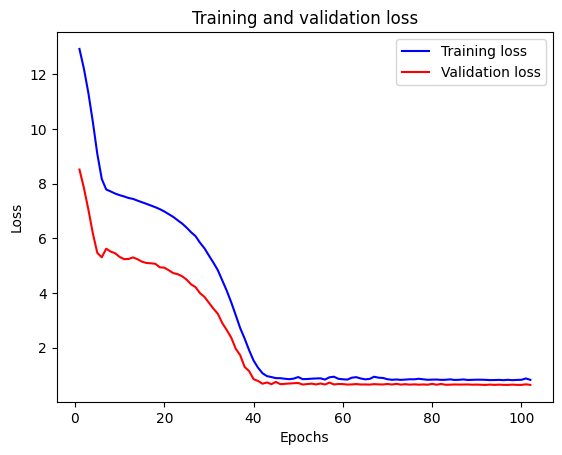

In [20]:
# Dense Neural Network (DNN) - HSV

# Create the model
model = Sequential()
model.add(Dense(32, input_dim=X_HSV_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', r_square]
)

# Fit the model to the training data
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10
)

history = model.fit(
    X_HSV_train, 
    y1_HSV_train, 
    epochs=1000, 
    batch_size=32, 
    validation_data=(X_HSV_test, y1_HSV_test), 
    callbacks=[es], 
    verbose=0
)

# Evaluate the model on the test data
score = model.evaluate(X_HSV_test, y1_HSV_test)
mse_DNN_HSV = score[1]
mae_DNN_HSV = score[2]
score_DNN_HSV = score[3]

# Print the results
print("DNN_HSV - R^2:", score_DNN_HSV)
print("DNN_HSV - MSE:", mse_DNN_HSV)
print("DNN_HSV - MAE", mae_DNN_HSV)

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 49: early stopping
2/2 [==============================] - 0s 4ms/step - loss: 0.1139 - mae: 0.2396 - mse: 0.1139 - r_square: 0.9752
CNN_RGB - R^2: 0.9752305150032043
CNN_RGB - MSE: 0.23962508141994476
CNN_RGB - MAE: 0.11388284713029861


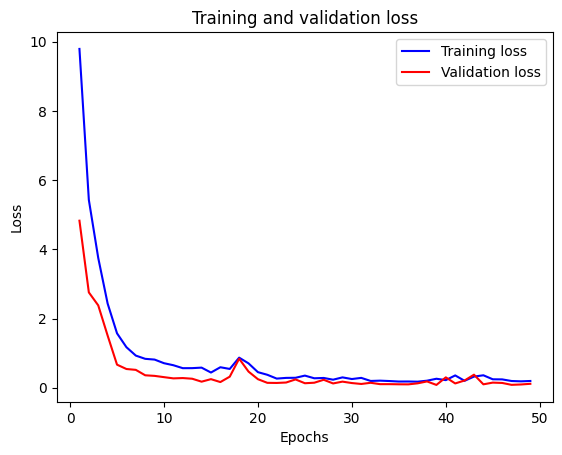

In [22]:
# Convolutionary Neural Network (CNN) - RGB

# Define model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(X_RGBimage_train.shape[1:])))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compile model
model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', r_square]
)

# Train model
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10
)

history = model.fit(
    X_RGBimage_train, 
    y1_RGBimage_train, 
    epochs=1000, 
    batch_size=32, validation_data=(X_RGBimage_test, y1_RGBimage_test), 
    callbacks=[es], 
    verbose=0
)

# Evaluate the model on the test data
score = model.evaluate(X_RGBimage_test, y1_RGBimage_test)
mse_CNN_RGB = score[1]
mae_CNN_RGB = score[2]
score_CNN_RGB = score[3]

# Print the results
print("CNN_RGB - R^2:", score_CNN_RGB)
print('CNN_RGB - MSE:', mse_CNN_RGB)
print('CNN_RGB - MAE:', mae_CNN_RGB)

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 62: early stopping
2/2 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.2107 - mse: 0.0815 - r_square: 0.9821


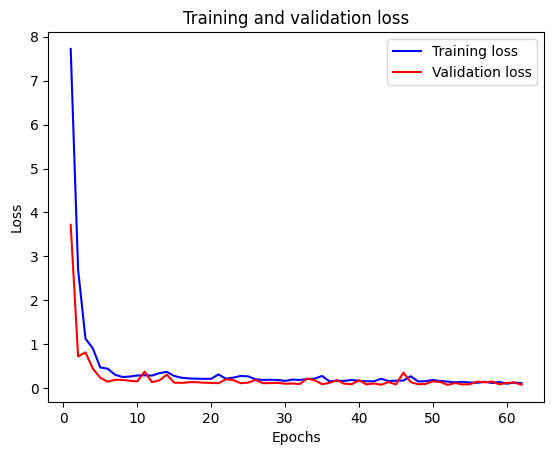

CNN_HSV - R^2: 0.9821465015411377
CNN_HSV - MSE: 0.2107255458831787
CNN_HSV - MAE: 0.0815272331237793


In [23]:
# Convolutionary Neural Network (CNN) - HSV

# Define model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(X_HSVimage_train.shape[1:])))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compile model
model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', r_square]
)

# Train model
es = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, 
    patience=10
)

history = model.fit(
    X_HSVimage_train, 
    y1_HSVimage_train, 
    epochs=1000, 
    batch_size=32, 
    validation_data=(X_HSVimage_test, y1_HSVimage_test), 
    callbacks=[es], 
    verbose=0
)

# Evaluate the model on the test data
score = model.evaluate(X_HSVimage_test, y1_HSVimage_test)
mse_CNN_HSV = score[1]
mae_CNN_HSV = score[2]
score_CNN_HSV = score[3]

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Print the results
print("CNN_HSV - R^2:", score_CNN_HSV)
print('CNN_HSV - MSE:', mse_CNN_HSV)
print('CNN_HSV - MAE:', mae_CNN_HSV)

In [24]:
# Summary 

# Summary for RGB
print("\x1B[4m" + 'RGB' + "\x1B[0m")
print("\x1B[4m" + 'R-square, Mean-squared Error, Mean Absolute Error' + "\x1B[0m")
print('LR : "%.4f", "%.4f", "%.4f"' % (score_LR_RGB, mse_LR_RGB, mae_LR_RGB))
print('SVR: "%.4f", "%.4f", "%.4f"' % (score_SVR_RGB, mse_SVR_RGB, mae_SVR_RGB))
print('GBR: "%.4f", "%.4f", "%.4f"' % (score_GBR_RGB, mse_GBR_RGB, mae_GBR_RGB))
print('RFR: "%.4f", "%.4f", "%.4f"' % (score_RFR_RGB, mse_RFR_RGB, mae_RFR_RGB))
print('DNN: "%.4f", "%.4f", "%.4f"' % (score_DNN_RGB, mse_DNN_RGB, mae_DNN_RGB))
print('CNN: "%.4f", "%.4f", "%.4f"' % (score_CNN_RGB, mse_CNN_RGB, mae_CNN_RGB))

# Summary for HSV
print("\x1B[4m" + '\nHSV' + "\x1B[0m")
print("\x1B[4m" + 'R-square, Mean-squared Error, Mean Absolute Error' + "\x1B[0m")
print('LR : "%.4f", "%.4f", "%.4f"' % (score_LR_HSV, mse_LR_HSV, mae_LR_HSV))
print('SVR: "%.4f", "%.4f", "%.4f"' % (score_SVR_HSV, mse_SVR_HSV, mae_SVR_HSV))
print('GBR: "%.4f", "%.4f", "%.4f"' % (score_GBR_HSV, mse_GBR_HSV, mae_GBR_HSV))
print('RFR: "%.4f", "%.4f", "%.4f"' % (score_RFR_HSV, mse_RFR_HSV, mae_RFR_HSV))
print('DNN: "%.4f", "%.4f", "%.4f"' % (score_DNN_HSV, mse_DNN_HSV, mae_DNN_HSV))
print('CNN: "%.4f", "%.4f", "%.4f"' % (score_CNN_HSV, mse_CNN_HSV, mae_CNN_HSV))

RGB
R-square, Mean-squared Error, Mean Absolute Error
LR : "0.9368", "0.2888", "0.4141"
SVR: "0.9841", "0.0727", "0.1666"
GBR: "0.9932", "0.0312", "0.1162"
RFR: "0.9809", "0.0871", "0.2442"
DNN: "0.9819", "0.2178", "0.0827"
CNN: "0.9752", "0.2396", "0.1139"

HSV
R-square, Mean-squared Error, Mean Absolute Error
LR : "0.9417", "0.2663", "0.4192"
SVR: "0.8641", "0.6210", "0.6217"
GBR: "0.9940", "0.0275", "0.1132"
RFR: "0.9461", "0.2464", "0.4101"
DNN: "0.8611", "0.6562", "0.6344"
CNN: "0.9821", "0.2107", "0.0815"
